In [89]:
import random
import pandas as pd
import matplotlib.pyplot as plt

import ai2thor
import ai2thor_colab
from ai2thor_colab import plot_frames, side_by_side
from ai2thor.controller import Controller

from IPython.display import clear_output

In [90]:
from ai2thor.platform import CloudRendering
controller = Controller(platform=CloudRendering)

## Workspace

In [91]:
def show_object_detected(controller):

    data = controller.last_event.metadata['objects']

    df_data = pd.DataFrame(data)

    df_object = df_data[(df_data['name'] == 'Toaster_f745e839') | (df_data['name'] == 'CoffeeMachine_d7084e0d') | 
                        (df_data['name'] == 'Microwave_e71f2758') | (df_data['name'] == 'Fridge_c8d99c87') | 
                        (df_data['name'] == 'LightSwitch_887b121a') | (df_data['name'] == 'Tomato_e65a6e2e')]
    
    print('Object detected:')
    print(dict(df_object['name'][df_object['visible'] == True]))

In [99]:
floor_index = random.randint(0, 30)
floor_index = "10"

controller = Controller(
    agentMode = "default", # default, locobot, arm
    visibilityDistance = 0.5,
    scene = f"FloorPlan{floor_index}",

    # step sizes
    gridSize = 0.25,
    snapToGrid = True,
    rotateStepDegrees = 90,

    # image modalitiesB
    renderInstanceSegmentation = False,
    renderDepthImage = False,
    renderSemanticSegmentation = False,
    renderNormalsImage = False,
    
    # camera properties
    width = 1200,
    height = 800,
    fieldOfView = 120
)

In [100]:
w = "MoveAhead"
a = "MoveLeft"
s = "MoveBack"
d = "MoveRight"

l = "RotateLeft"
r = "RotateRight"

In [101]:
data = controller.last_event.metadata['objects']
df_data = pd.DataFrame(data)

Agent position:
{'x': -1.5, 'y': 0.9009992480278015, 'z': 1.5}
Object detected:
{}


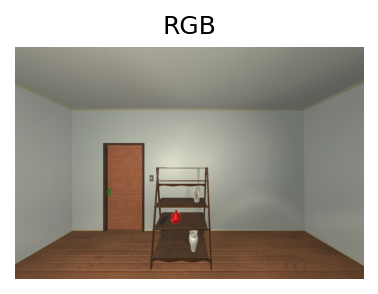

In [136]:
command = s

event = controller.step(command)
agent_position = event.metadata["agent"]["position"]

print("Agent position:")
print(agent_position)
show_object_detected(controller)

plot_frames(controller.last_event)

---

In [96]:
metadata = event.metadata
list(metadata.keys())

['objects',
 'isSceneAtRest',
 'agent',
 'heldObjectPose',
 'arm',
 'fov',
 'cameraPosition',
 'cameraOrthSize',
 'thirdPartyCameras',
 'collided',
 'collidedObjects',
 'inventoryObjects',
 'sceneName',
 'lastAction',
 'errorMessage',
 'errorCode',
 'lastActionSuccess',
 'screenWidth',
 'screenHeight',
 'agentId',
 'depthFormat',
 'colors',
 'flatSurfacesOnGrid',
 'distances',
 'normals',
 'isOpenableGrid',
 'segmentedObjectIds',
 'objectIdsInBox',
 'actionIntReturn',
 'actionFloatReturn',
 'actionStringsReturn',
 'actionFloatsReturn',
 'actionVector3sReturn',
 'visibleRange',
 'currentTime',
 'sceneBounds',
 'actionReturn']

In [97]:
scene_name = event.metadata["sceneName"]
scene_bounds = event.metadata["sceneBounds"]
print(f"Scene name: {scene_name}, Scene bounds: X = {scene_bounds['size']['x']}, Y = {scene_bounds['size']['y']}")

Scene name: FloorPlan20_physics, Scene bounds: X = 4.199999809265137, Y = 2.709681510925293


In [98]:
objects = controller.last_event.metadata['objects']
print(f"Total objects: {len(objects)}")

Total objects: 69


In [ ]:
names = [obj['name'] for obj in objects]
names # CoffeeMachine_ce92cf84, Fridge_5134d575, Vase_7932859a

In [ ]:
def encode_feedback(event, controller, target_name):
    
    agent_position = event.metadata["agent"]["position"]
    data = controller.last_event.metadata['objects']
    
    index_location = next((index for index, item in enumerate(data) if item['name'] == target_name), None)
    is_found = data[index_location]['visible']
    
    if is_found:
        reward = +10
    else:
        reward = -0.05
    
    return None, random.random(), is_found, None

---